<a href="https://colab.research.google.com/github/TarfaGaida/Final-Project-_Churn-Anlysis/blob/main/Final_ProjectDS_Tarfa_Gaida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install & Load Library

In [ ]:
!pip install dalex
!pip install scikit-plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.2-py3-none-any.whl size=1042898 sha256=fef3f0c1d739c6c0778d71302be76a2f58513e95913ae0665a4ad75cb27263c4
  Stored in directory: /root/.cache/pip/wheels/cd/5e/ec/848120d5b913158656c0f8ef316233dd3356effa64aef19fba
Successfully built dalex


In [ ]:
# load pandas untuk data wrangling
import pandas as pd
# load numpy untuk manipulasi vektor
import numpy as np
# load matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# load seaborn untuk visualisasi data
import seaborn as sns

# load metrics object dari sklearn
from sklearn import metrics
# load train-test data splitter
from sklearn.model_selection import train_test_split
# load Decision Tree classifier model
from sklearn.tree import DecisionTreeClassifier
# load Random Forest classifier model
from sklearn.ensemble import RandomForestClassifier
# # load SVM classifier model
# from sklearn.svm import SVC
# # load KNN classifier model
# from sklearn.neighbors import KNeighborsClassifier

# load xgboost classifier model
from xgboost import XGBClassifier

# Load DALEX untuk interpretability
import dalex as dx


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# load scikitplot untuk visualisasi metrik
#import scikitplot as skplt --> gagal running harus  downlioad scipy

%matplotlib inline

In [ ]:
!pip install scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 24.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
# load scikitplot untuk visualisasi metrik
import scikitplot as skpl

ImportError: cannot import name 'interp' from 'scipy' (/usr/local/lib/python3.11/dist-packages/scipy/__init__.py)

# Load Dataset

Dataset ini memberikan gambaran tentang interaksi pelanggan dengan toko ritel online, yang bertujuan untuk memprediksi perputaran pelanggan berdasarkan berbagai fitur perilaku dan demografis. Data ini mencakup data demografi pelanggan, perilaku belanja, tingkat kepuasan, dan keterlibatan dengan kampanye pemasaran.

* Customer_ID: A unique identifier for each customer.
* Age: The customer's age.
* Gender: The customer's gender (Male, Female, Other).
* Annual_Income: The annual income of the customer in thousands of dollars.
* Total_Spend: The total amount spent by the customer in the last year.
* Years_as_Customer: The number of years the individual has been a customer of   the store.
* Num_of_Purchases: The number of purchases the customer made in the last year.
* Average_Transaction_Amount: The average amount spent per transaction.
* Num_of_Returns: The number of items the customer returned in the last year.
* Num_of_Support_Contacts: The number of times the customer contacted support  
  in the last year.
* Satisfaction_Score: A score from 1 to 5 indicating the customer's * satisfaction with the store.
* Last_Purchase_Days_Ago: The number of days since the customer's last purchase.
* Email_Opt_In: Whether the customer has opted in to receive marketing emails.
* Promotion_Response: The customer's response to the last promotional campaign (Responded, Ignored, Unsubscribed).
* Target_Churn: Indicates whether the customer churned (True or False).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Final Project/online_retail_customer_churn.csv')
df.head(10)

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
5,6,57,Male,190.43,255.19,19,85,417.78,5,1,4,130,False,Unsubscribed,False
6,7,27,Male,172.13,3512.55,3,77,316.18,0,3,1,61,True,Unsubscribed,False
7,8,37,Other,88.90,7270.90,4,87,63.61,3,4,3,224,False,Ignored,False
8,9,39,Other,24.46,4935.49,1,21,173.80,9,2,4,126,True,Responded,True
9,10,68,Other,169.59,9803.57,17,34,481.18,6,1,2,171,True,Unsubscribed,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

In [ ]:
df.shape

(1000, 15)

In [ ]:
df.describe()

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


In [ ]:
## Missing Value
df.isnull().sum()

,0
Customer_ID,0
Age,0
Gender,0
Annual_Income,0
Total_Spend,0
Years_as_Customer,0
Num_of_Purchases,0
Average_Transaction_Amount,0
Num_of_Returns,0
Num_of_Support_Contacts,0


In [ ]:
## Check Duplicate
df.duplicated().sum()

np.int64(0)

pada dataset tidak ada missing value dan dulicate

In [ ]:
print(df['Gender'].value_counts())
print(df['Promotion_Response'].value_counts())
print(df['Target_Churn'].value_counts())
print(df['Email_Opt_In'].value_counts())

Gender
Female    342
Male      334
Other     324
Name: count, dtype: int64
Promotion_Response
Unsubscribed    361
Responded       338
Ignored         301
Name: count, dtype: int64
Target_Churn
True     526
False    474
Name: count, dtype: int64
Email_Opt_In
True     529
False    471
Name: count, dtype: int64


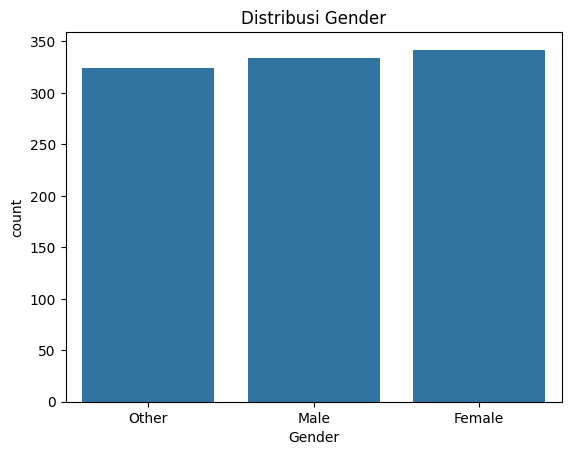

In [ ]:
sns.countplot(data=df, x='Gender')
plt.title('Distribusi Gender')
plt.show()


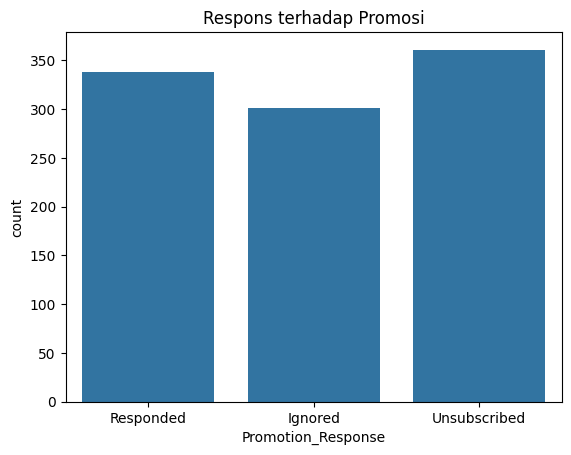

In [ ]:
sns.countplot(data=df, x='Promotion_Response')
plt.title('Respons terhadap Promosi')
plt.show()

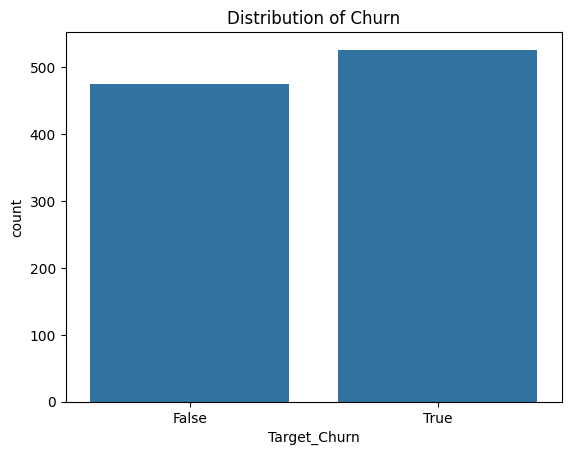

In [ ]:
# Explore distribution of the target variable
sns.countplot(x='Target_Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

pada chart diatas menunjukan pelanggan yang churn lebih tinggi dari pelanggan yang bertahan

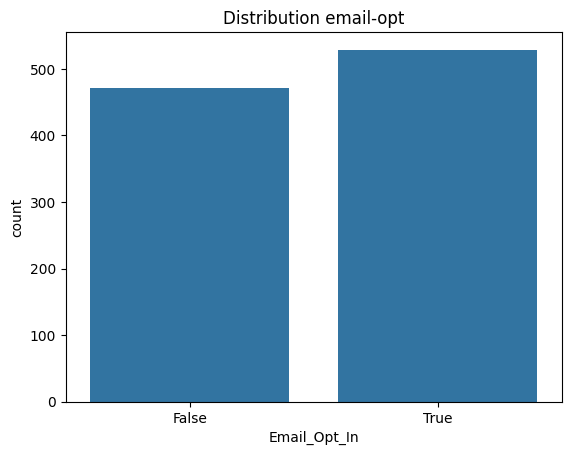

In [ ]:
sns.countplot(x='Email_Opt_In', data=df)
plt.title('Distribution email-opt')
plt.show()

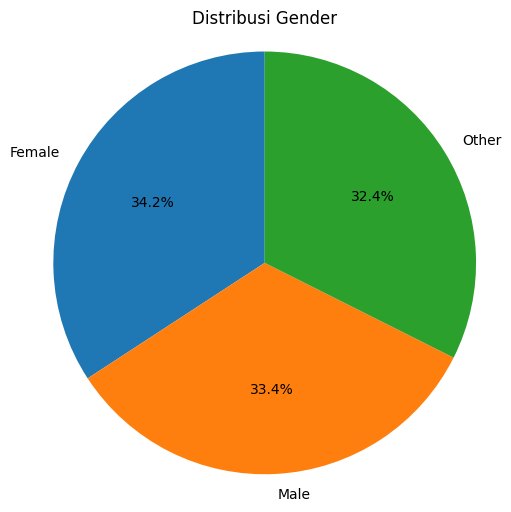

In [ ]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Gender')
plt.axis('equal')
plt.show()

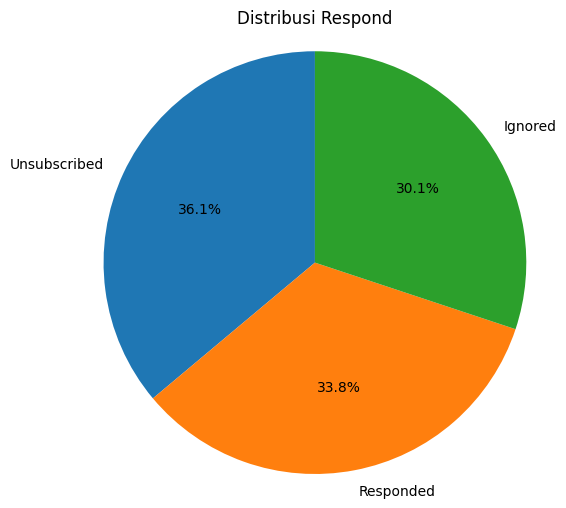

In [ ]:
respond_counts = df['Promotion_Response'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(respond_counts, labels=respond_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Respond')
plt.axis('equal')
plt.show()

# EDA

1. apakah pelanggan dengan satification score rendah berpotensi churn?
2. apakah pelanggan dengan total spending  yang rendah berpotensi churn?
3. apakah pelanggan dengan numer of retun tinggi berpotensi churn?
4. bagaimana pengaruh respon promosi pelanggan terhadap churn rate?
5. gender mana yang memmiliki rata-rata totel spending tinggi, dan bagaimana churnrate nya.

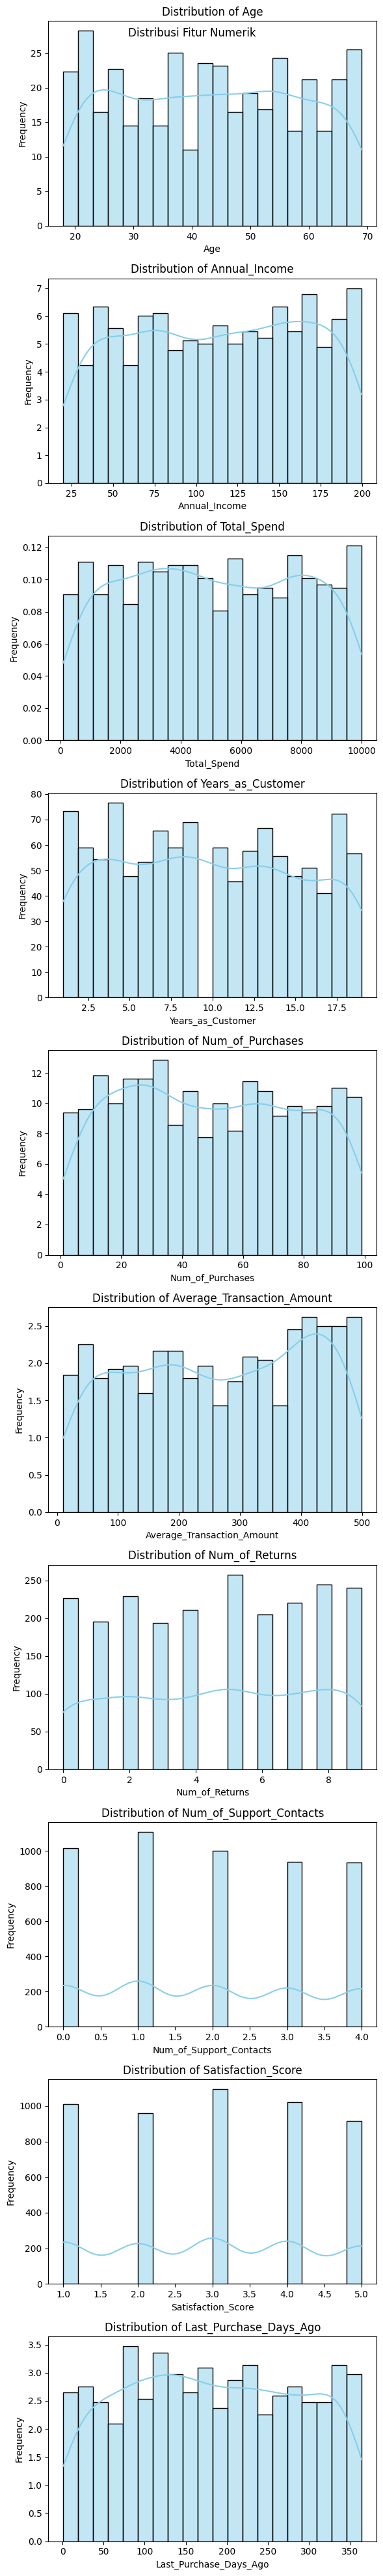

In [ ]:
# Distribusi fitur
# Numerik
num_cols = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
            'Num_of_Purchases', 'Average_Transaction_Amount',
            'Num_of_Returns', 'Num_of_Support_Contacts',
            'Satisfaction_Score', 'Last_Purchase_Days_Ago']

fig, axes = plt.subplots(len(num_cols), 1, figsize=(6, 4 * len(num_cols))) # Adjust figsize as needed

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=20, stat='frequency', kde=True, color='skyblue', ax=axes[i])  # Use the seaborn function for histplot
    axes[i].set_title(f'Distribution of {col}')

plt.suptitle('Distribusi Fitur Numerik')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()



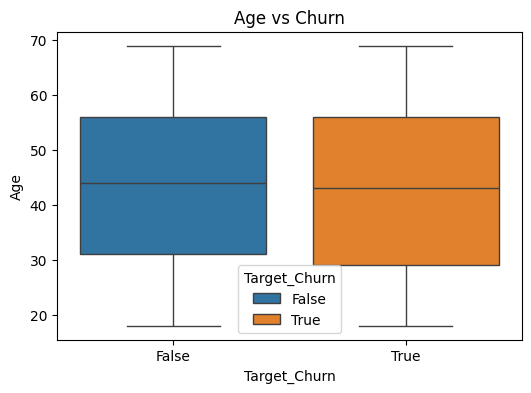

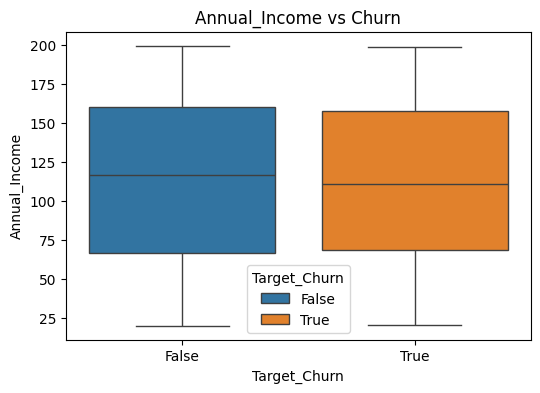

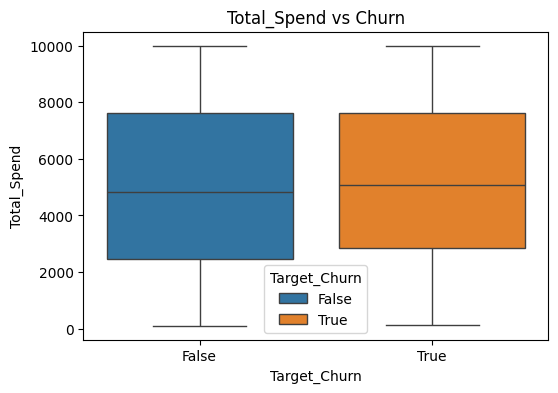

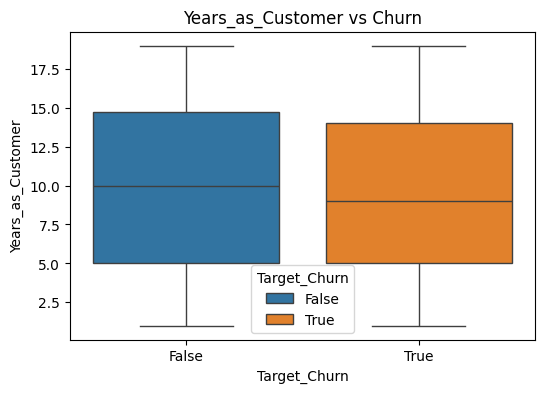

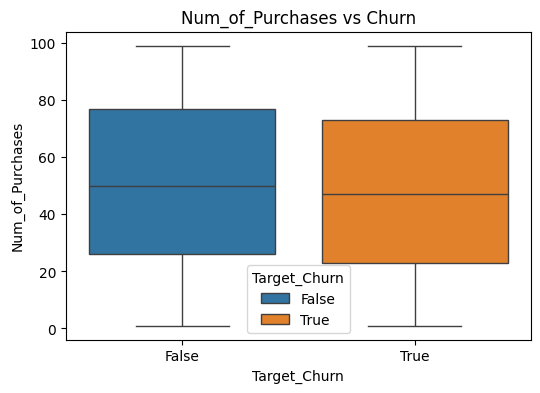

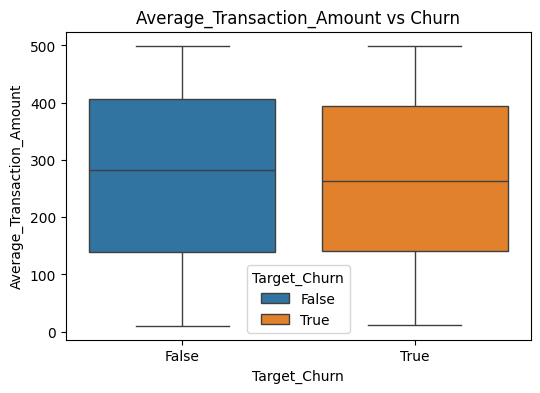

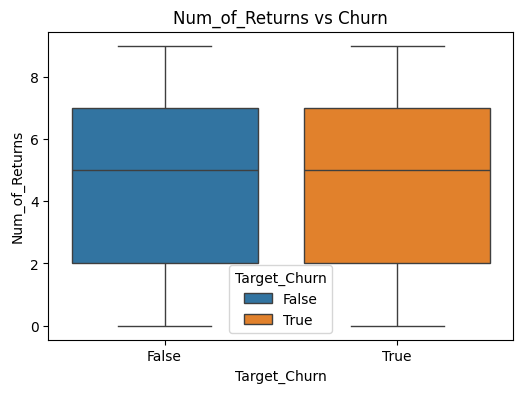

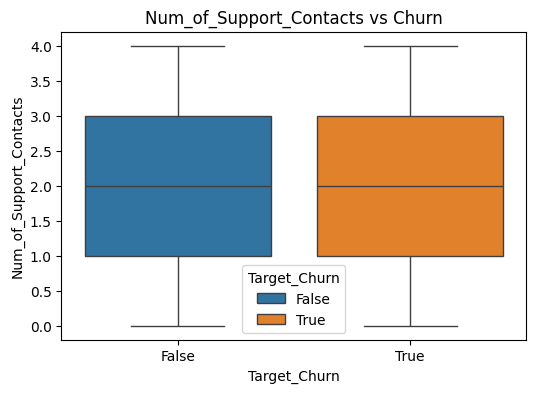

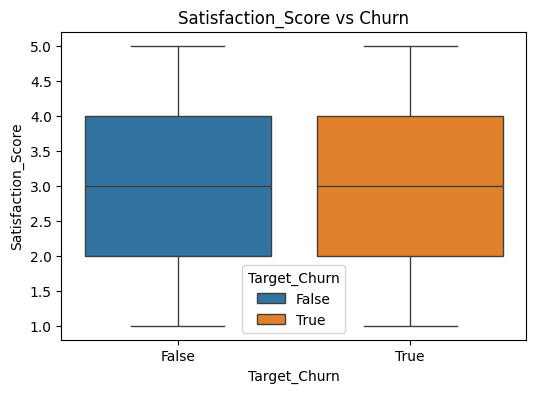

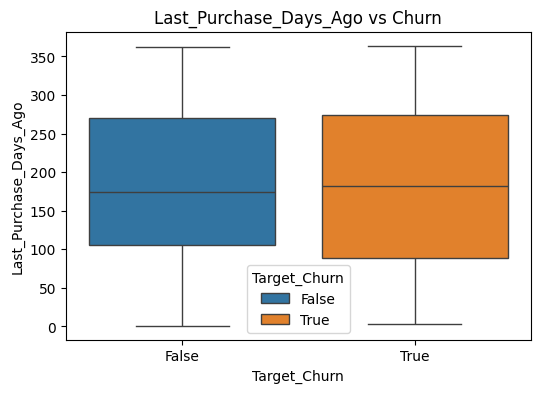

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Target_Churn', y=col, hue = 'Target_Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

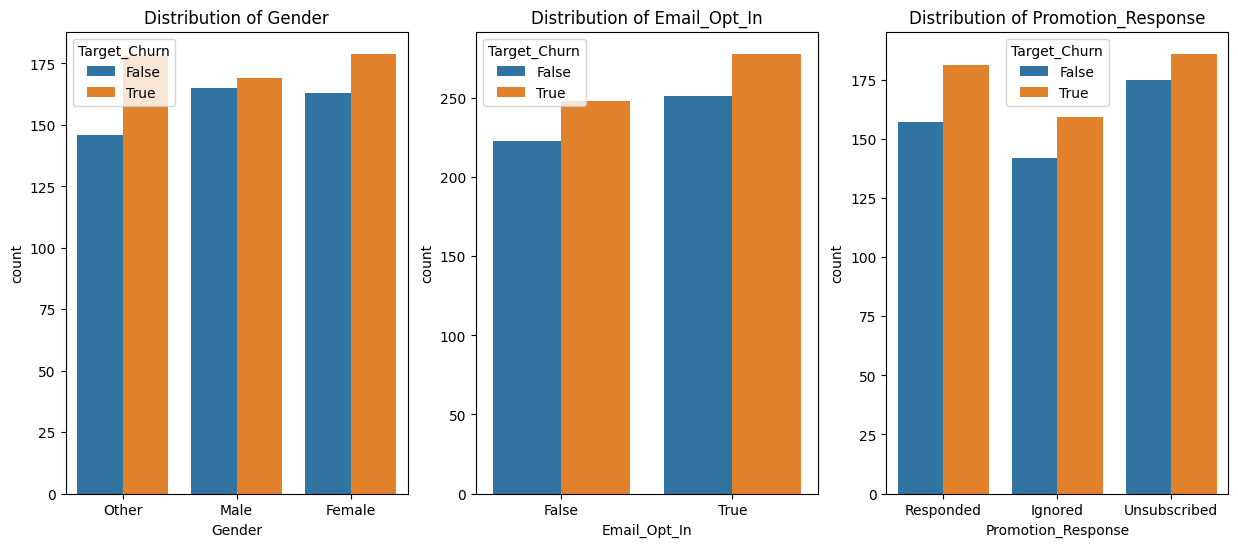

In [ ]:
# Kategorikal
cat_cols = ['Gender', 'Email_Opt_In', 'Promotion_Response']
fig, axes = plt.subplots(nrows=1, ncols=len(cat_cols), figsize=(15, 6))
for i, feature in enumerate(cat_cols):
    sns.countplot(x=feature, hue='Target_Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
plt.show()

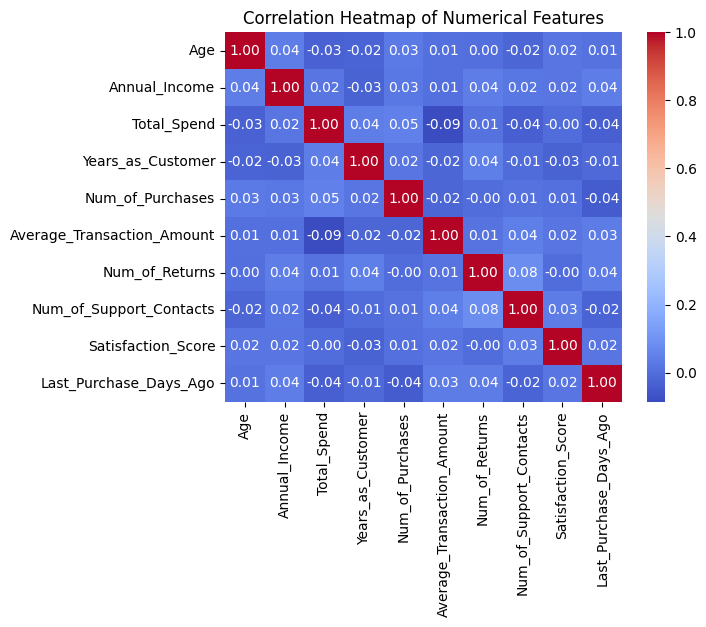

In [ ]:
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

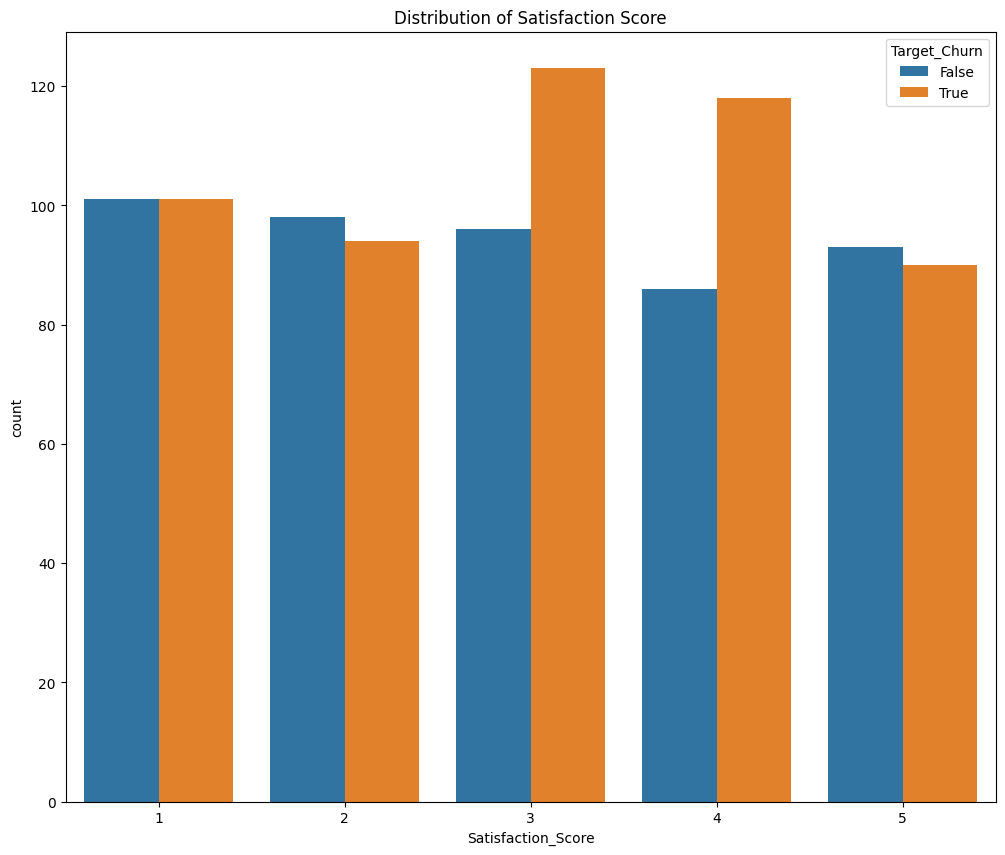

In [ ]:
#1. apakah pelanggan dengan satification score rendah berpotensi churn?
plt.figure(figsize=(12, 10))
sns.countplot(x= df['Satisfaction_Score'], hue=df['Target_Churn'])
plt.title('Distribution of Satisfaction Score')
plt.show()


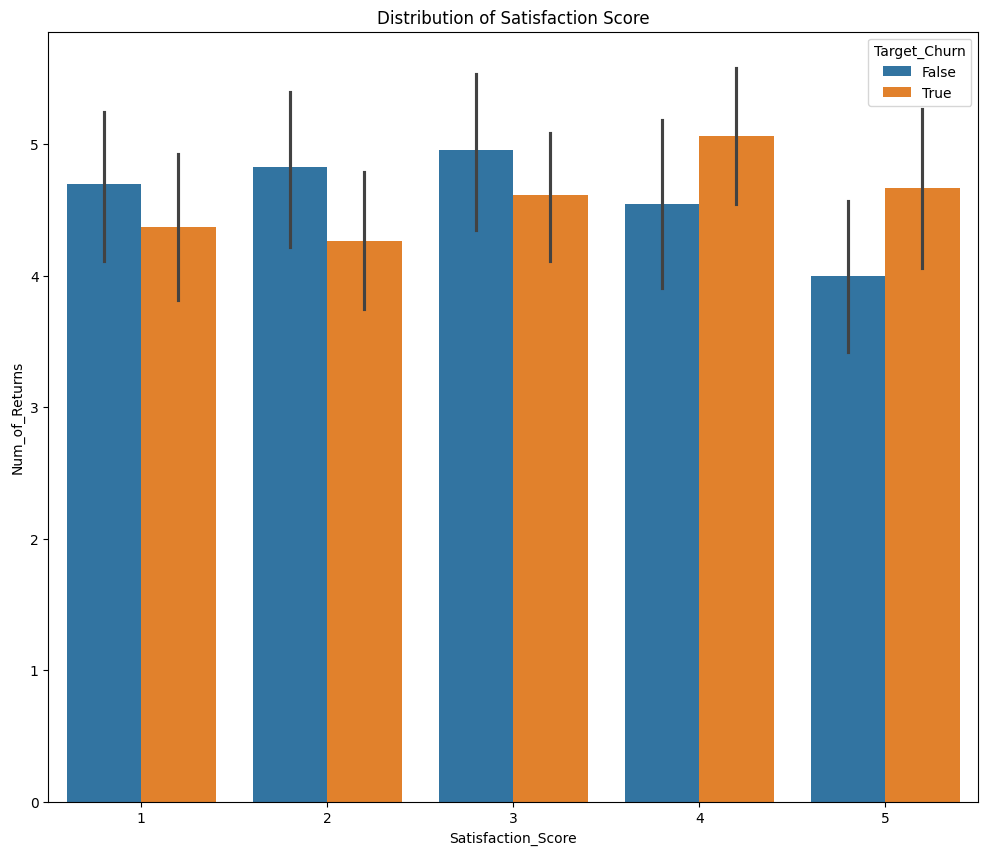

In [ ]:
plt.figure(figsize=(12, 10))
sns.barplot(x= df['Satisfaction_Score'], y= df['Num_of_Returns'], hue=df['Target_Churn'])
plt.title('Distribution of Satisfaction Score')
plt.show()

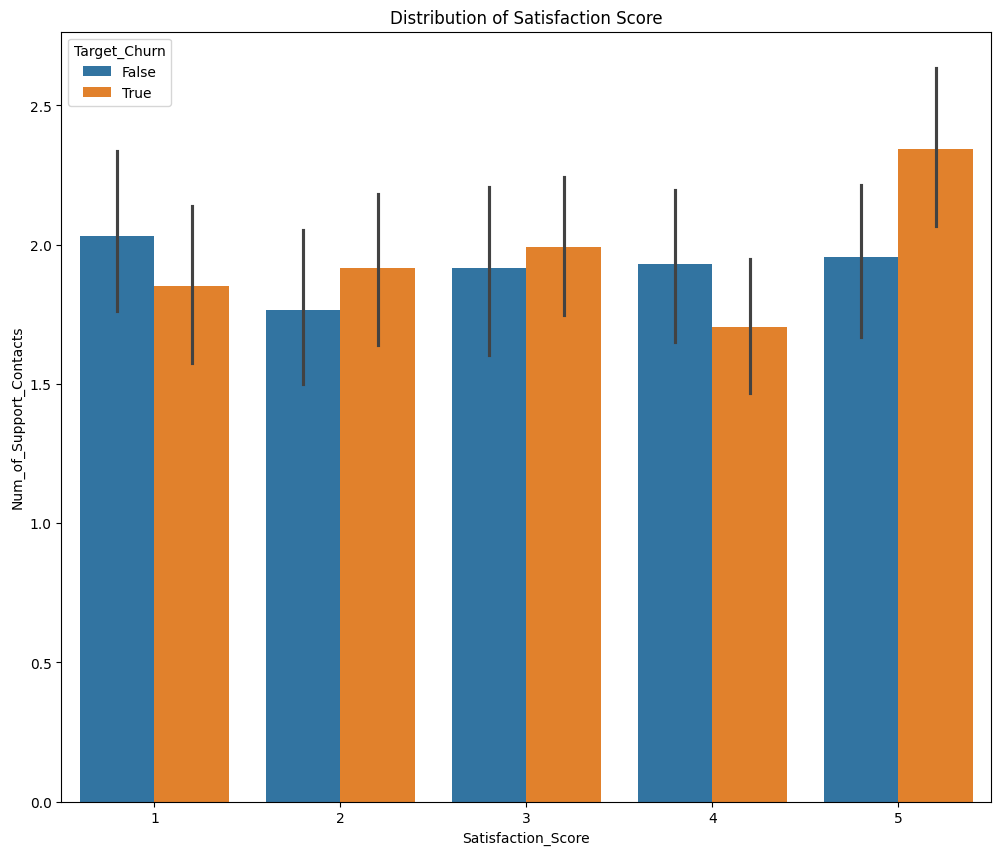

In [ ]:
plt.figure(figsize=(12, 10))
sns.barplot(x= df['Satisfaction_Score'], y= df['Num_of_Support_Contacts'], hue=df['Target_Churn'])
plt.title('Distribution of Satisfaction Score')
plt.show()

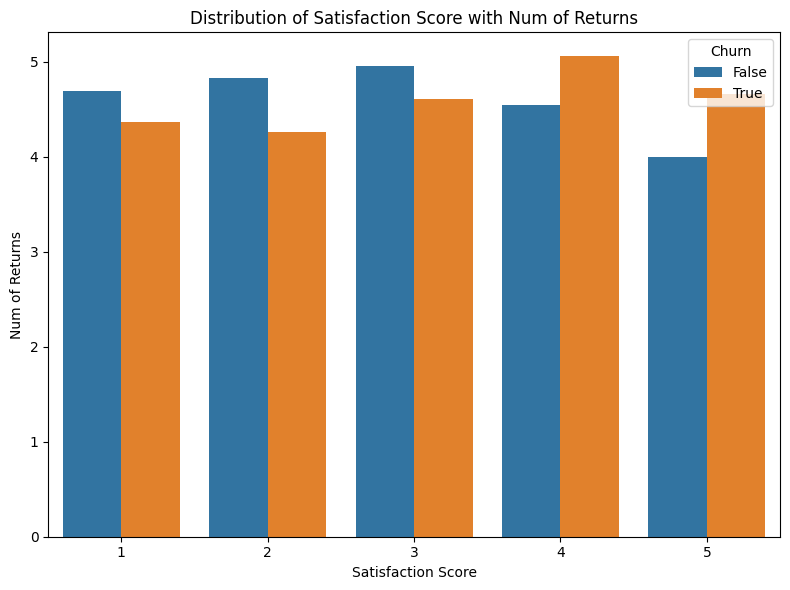

In [ ]:
# group satification score and numebr of return by churn
grouped = df.groupby(["Satisfaction_Score", "Target_Churn"])["Num_of_Returns"].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x = "Satisfaction_Score", y = "Num_of_Returns" , hue="Target_Churn", data=grouped)
plt.title('Distribution of Satisfaction Score with Num of Returns')
plt.ylabel("Num of Returns")
plt.xlabel("Satisfaction Score")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()





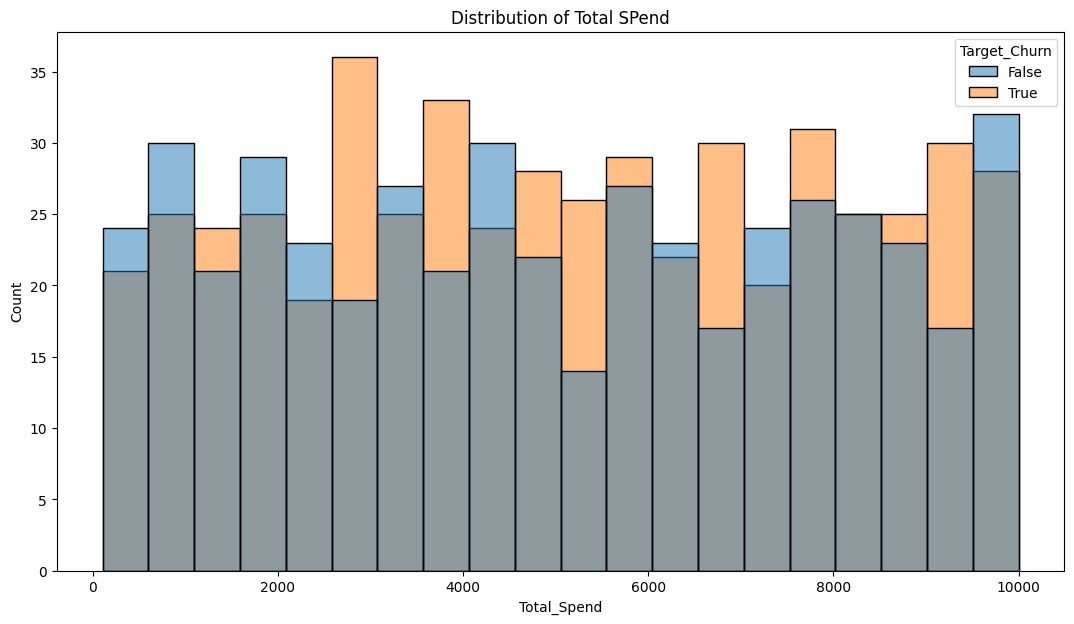

In [ ]:
#2. apakah pelanggan dengan total spned yang rendah berpotensi churn?
fig, axes = plt.subplots(figsize=(13, 7))
sns.histplot(data = df,x = "Total_Spend",bins= 20,hue="Target_Churn",ax=axes)
plt.title('Distribution of Total SPend')
plt.show()
plt.show()

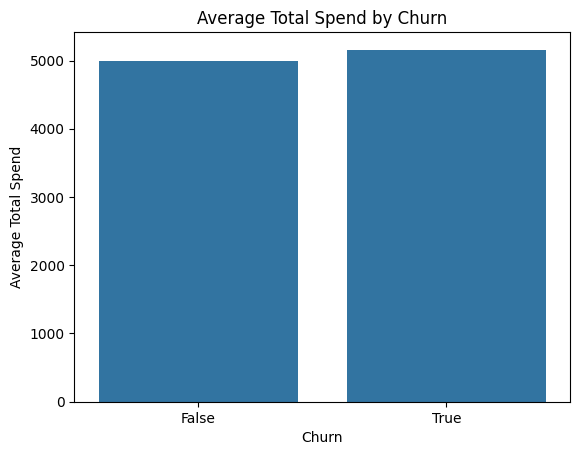

In [ ]:
#bagaimana jika total spendnya beruoa rata rata
mean_spend = df.groupby("Target_Churn")["Total_Spend"].mean().reset_index()

sns.barplot(x="Target_Churn", y="Total_Spend", data=mean_spend)
plt.title("Average Total Spend by Churn")
plt.ylabel("Average Total Spend")
plt.xlabel("Churn")
plt.show()

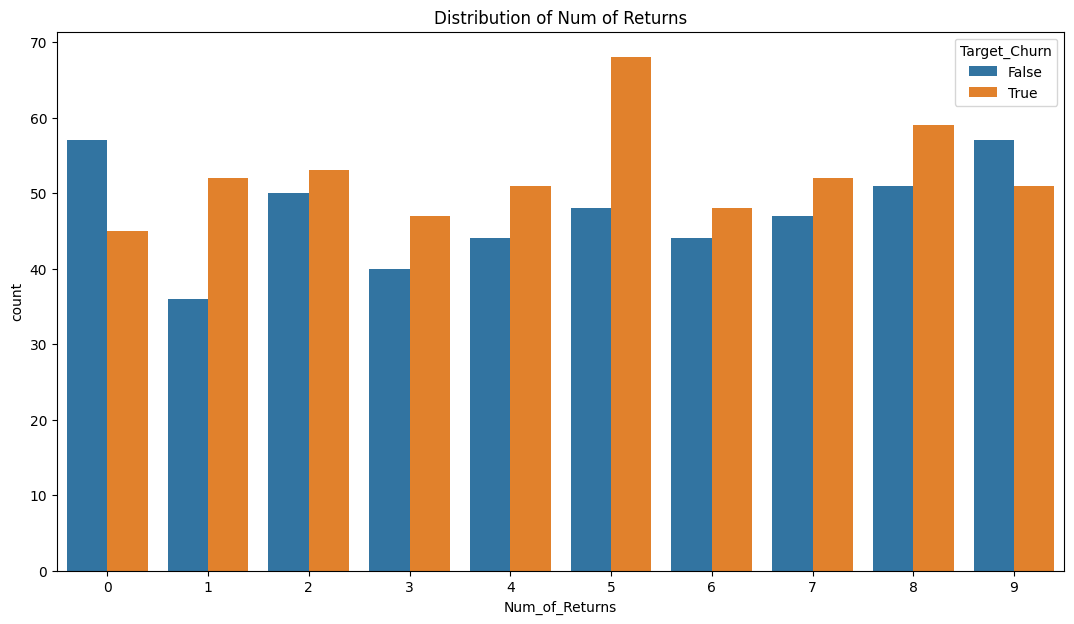

In [ ]:
#3. apakah pelanggan dengan numer of retun tinggi berpotensi churn?
fig, axes = plt.subplots(figsize=(13, 7))
sns.countplot(data = df,x = "Num_of_Returns",hue="Target_Churn")
plt.title('Distribution of Num of Returns')
plt.show()

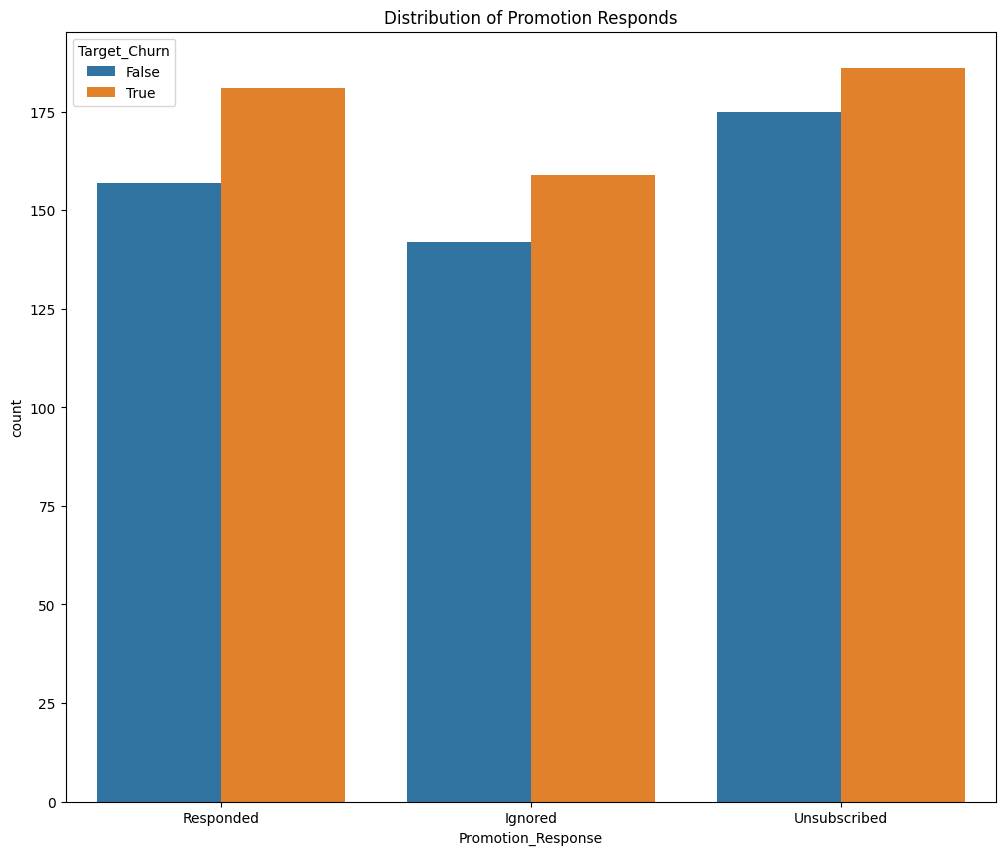

In [ ]:
#4. bagaimana pengaruh respon promosi pelanggan terhadap churn rate?
plt.figure(figsize=(12, 10))
sns.countplot(x= df['Promotion_Response'], hue=df['Target_Churn'])
plt.title('Distribution of Promotion Responds')
plt.show()



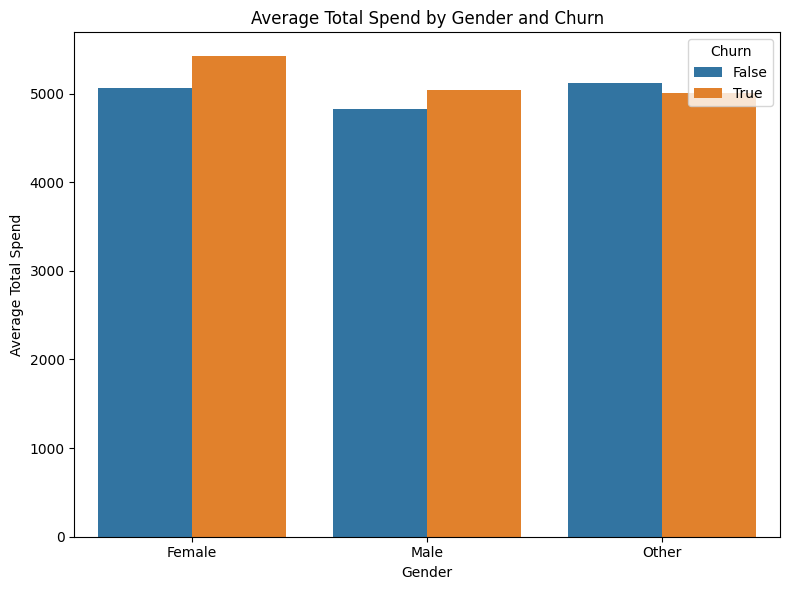

In [ ]:
#5. gender mana yang memmiliki rata-rata totel spending tinggi, dan bagaimana churnrate nya.
grouped = df.groupby(["Gender", "Target_Churn"])["Total_Spend"].mean().reset_index()


plt.figure(figsize=(8,6))
sns.barplot(x="Gender", y="Total_Spend", hue="Target_Churn", data=grouped,)

plt.title("Average Total Spend by Gender and Churn")
plt.ylabel("Average Total Spend")
plt.xlabel("Gender")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

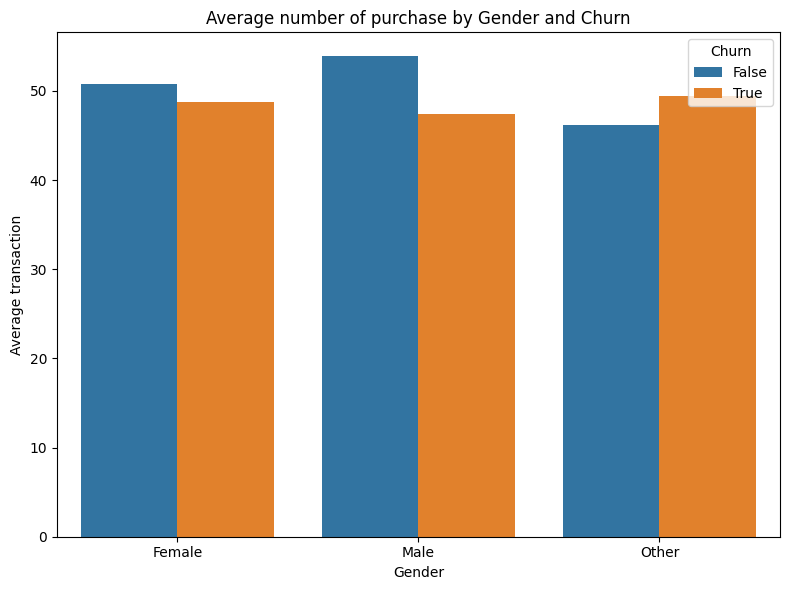

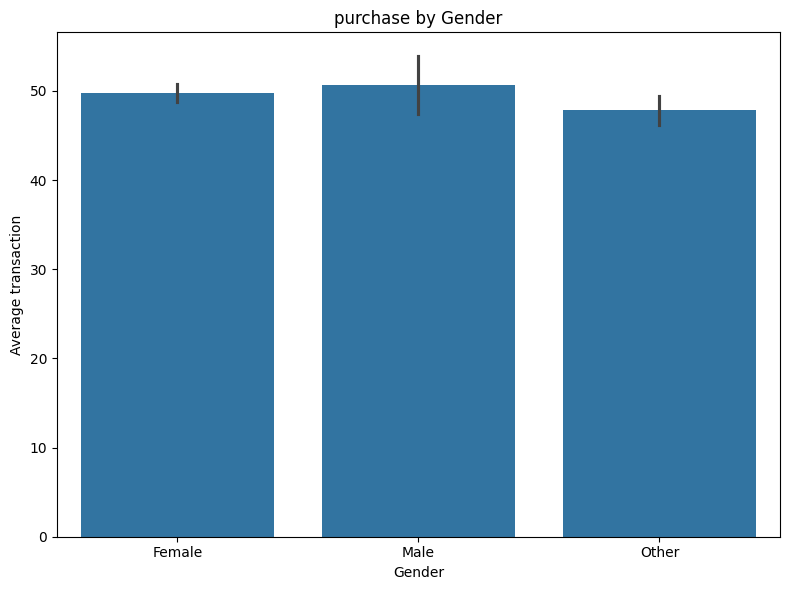

In [ ]:
gr = df.groupby(["Gender", "Target_Churn"])["Num_of_Purchases"].mean().reset_index()


plt.figure(figsize=(8,6))
sns.barplot(x="Gender", y="Num_of_Purchases", hue="Target_Churn", data=gr,)

plt.title("Average number of purchase by Gender and Churn")
plt.ylabel("Average transaction")
plt.xlabel("Gender")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(x="Gender", y="Num_of_Purchases", data=gr,)

plt.title("purchase by Gender")
plt.ylabel("Average transaction")
plt.xlabel("Gender")

plt.tight_layout()
plt.show()

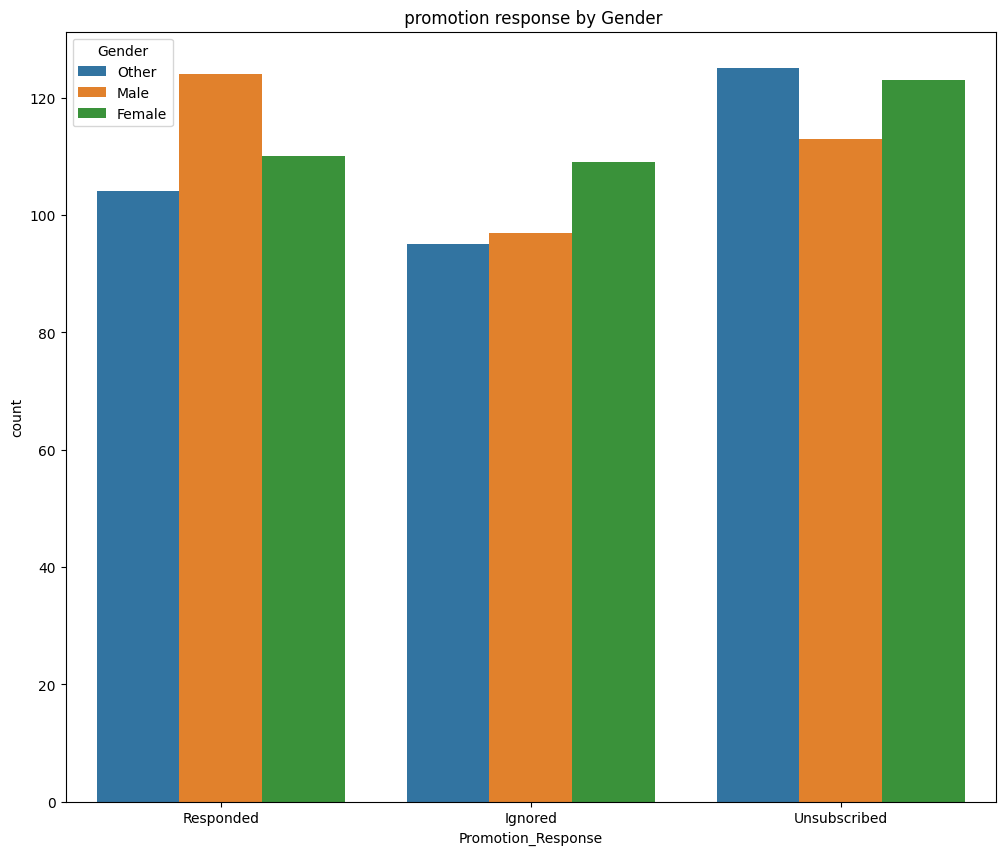

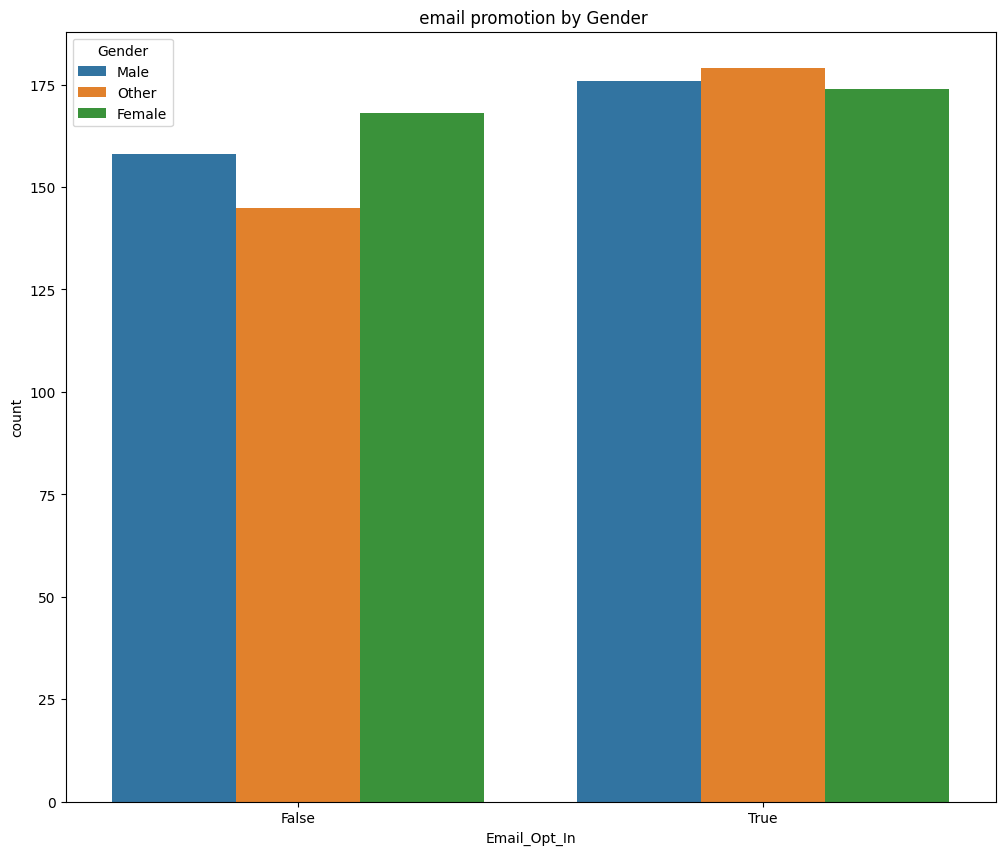

In [ ]:
plt.figure(figsize=(12, 10))
sns.countplot(x= df['Promotion_Response'], hue=df['Gender'])
plt.title(' promotion response by Gender')
plt.show()

plt.figure(figsize=(12, 10))
sns.countplot(x= df['Email_Opt_In'], hue=df['Gender'])
plt.title(' email promotion by Gender')
plt.show()

# Feature Engineering


In [ ]:
#copy data frame
df_ft = df.copy()

In [ ]:
#interaction feature
# Return rate,
df_ft['Return_Rate'] = df_ft['Num_of_Returns'] / df_ft['Num_of_Purchases']

In [ ]:
# support contact rate, rate pelanggan menghubungi CS selama berlangganan
df_ft['Support_Contact_Rate'] = df_ft['Num_of_Support_Contacts'] / df_ft['Years_as_Customer'].replace(0, 1)
# spending per year
df_ft['Spending_Per_Year'] = df_ft['Total_Spend'] / df_ft['Years_as_Customer'].replace(0, 1)
#purchase frequency
df_ft['Purchase_Frequency'] = df_ft['Num_of_Purchases'] / df_ft['Years_as_Customer'].replace(0, 1)
# income spend ratio
df_ft['Income_Spend_Ratio'] = df_ft['Total_Spend'] / df_ft['Annual_Income'].replace(0, 1)

In [ ]:
df_ft.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn,Return_Rate,Support_Contact_Rate,Spending_Per_Year,Purchase_Frequency,Income_Spend_Ratio
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True,0.090909,0.000000,1178.516000,4.400000,130.511185
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False,0.025974,0.153846,694.266923,5.923077,113.513646
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True,0.070423,0.153846,47.602308,5.461538,21.200069
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True,0.151515,1.000000,3036.766667,11.000000,114.407886
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False,0.069767,0.000000,359.392000,2.866667,69.416431


In [ ]:
#drop kolom tidak releven
df_ft.drop(columns=['Customer_ID'], inplace=True)

In [ ]:
cat_cols = df_ft [['Gender', 'Email_Opt_In', 'Promotion_Response']]
cat_cols
for i in cat_cols:
    print(f"**** '{i}' unique values ****")
    print(df_ft[i].value_counts())
    print()

**** 'Gender' unique values ****
Gender
Female    342
Male      334
Other     324
Name: count, dtype: int64

**** 'Email_Opt_In' unique values ****
Email_Opt_In
True     529
False    471
Name: count, dtype: int64

**** 'Promotion_Response' unique values ****
Promotion_Response
Unsubscribed    361
Responded       338
Ignored         301
Name: count, dtype: int64



In [ ]:
# encoding kolom kategorikal
df_ft['Gender'].replace({'Male': 0, 'Female': 1, 'Other': 2}, inplace=True)
df_ft['Promotion_Response'].replace({'Responded': 0, 'Ignored': 1, 'Unsubscribed': 2}, inplace=True)


In [ ]:
df_ft['Email_Opt_In'] = df_ft['Email_Opt_In'].astype(int)
df_ft['Target_Churn'] = df_ft['Target_Churn'].astype(int)

In [ ]:
df_ft.head(
)

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn,Return_Rate,Support_Contact_Rate,Spending_Per_Year,Purchase_Frequency,Income_Spend_Ratio
0,62,2,45.15,5892.58,5,22,453.80,2,0,3,129,1,0,1,0.090909,0.000000,1178.516000,4.400000,130.511185
1,65,0,79.51,9025.47,13,77,22.90,2,2,3,227,0,0,0,0.025974,0.153846,694.266923,5.923077,113.513646
2,18,0,29.19,618.83,13,71,50.53,5,2,2,283,0,0,1,0.070423,0.153846,47.602308,5.461538,21.200069
3,21,2,79.63,9110.30,3,33,411.83,5,3,5,226,1,1,1,0.151515,1.000000,3036.766667,11.000000,114.407886
4,21,2,77.66,5390.88,15,43,101.19,3,0,5,242,0,2,0,0.069767,0.000000,359.392000,2.866667,69.416431


## Split Data train-test

In [ ]:
X = df_ft.drop(columns=['Target_Churn'])
y = df_ft['Target_Churn']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify = y,
    random_state=1000
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 18), (200, 18), (800,), (200,))

In [ ]:
# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Jadikan DataFrame lagi
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1000)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [ ]:
# SMOTE,kembali ke DataFrame
X_train_sm = pd.DataFrame(X_train_sm, columns=X_train.columns)

# Model

In [ ]:
y_train.value_counts(normalize=True)

,proportion
Target_Churn,
1,0.52625
0,0.47375


## Define model


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(
    random_state=1000,
    class_weight={0: 0.47375, 1: 0.52625},
    solver='liblinear'
)


In [ ]:
# Hypertruning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 500]
}
log_gridcv = GridSearchCV(estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1)


**Random Forest**

In [ ]:
rf_clf = RandomForestClassifier(
    random_state=1000,
    class_weight = {0: 0.47375, 1:0.52625}
)

In [ ]:
# Hyperturning


parameters = {
    'n_estimators': [10,20,30,40,50],
    'max_depth':[1,2,3,4,5]
}
 #note: we use recall
rf_clf_gridcv = GridSearchCV(
    estimator=rf_clf,
    param_grid=parameters,
    cv=5,
    scoring='recall',
    n_jobs=-1
)


**XGBoost**

In [ ]:
xgb_clf = XGBClassifier(
    random_state=1000,
    class_weight = {0: 0.47375, 1:0.52625}
)

In [ ]:
# Grid parameters
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV
xgb_gridcv = GridSearchCV(
    estimator=xgb_clf,
    param_grid=parameters,
    cv=5,
    scoring='recall',
    verbose=1,
    n_jobs=-1
)


## Train Model

**Logistic Regression**

In [ ]:
# log_gridcv.fit(X_train, y_train)
# # log_best = log_grid.best_estimator_

In [ ]:
log_gridcv.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={0: 0.47375, 1: 0.52625},
                                          random_state=1000,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2']},
             scoring='recall')

**Random Forest**

In [ ]:
rf_clf_gridcv.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.47375,
                                                            1: 0.52625},
                                              random_state=1000),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='recall')

**XGBoost**

In [ ]:
xgb_gridcv.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None,
                                     class_weight={0: 0.47375, 1: 0.52625},
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='recall', verbose=1)

In [ ]:
X_train.shape

(800, 18)

In [ ]:
X_test.shape

(200, 18)

## Pred- Data Train

In [ ]:
#Log-Regression prediction data train
log_pred_train = log_gridcv.predict(X_train_sm)
log_pred_proba = log_gridcv.predict_proba(X_train_sm)


In [ ]:
# random forest prediction data train
rf_pred_train = rf_clf_gridcv.predict(X_train_sm)
rf_pred_proba = rf_clf_gridcv.predict_proba(X_train_sm)


In [ ]:
# XGBoost prediction
xgb_pred_train = xgb_gridcv.predict(X_train_sm)
xgb_pred_proba = xgb_gridcv.predict_proba(X_train_sm)

## Pred- Data Test


In [ ]:
#Log-Regression prediction
log_pred = log_gridcv.predict(X_test)
log_pred_proba = log_gridcv.predict_proba(X_test)

In [ ]:
# random forest prediction
rf_pred = rf_clf_gridcv.predict(X_test)
rf_pred_proba = rf_clf_gridcv.predict_proba(X_test)


In [ ]:
# XGBoost prediction
xgb_pred = xgb_gridcv.predict(X_test)
xgb_pred_proba = xgb_gridcv.predict_proba(X_test)

## Model Evaluation


### data train evaluation

In [ ]:
pd.DataFrame(metrics.classification_report(y_train_sm, log_pred_train, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.553648,0.520525,0.529691,0.537087,0.537087
recall,0.306413,0.752969,0.529691,0.529691,0.529691
f1-score,0.394495,0.615534,0.529691,0.505015,0.505015
support,421.000000,421.000000,0.529691,842.000000,842.000000


In [ ]:
pd.DataFrame(metrics.classification_report(y_train_sm, rf_pred_train, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.596491,0.515110,0.526128,0.555801,0.555801
recall,0.161520,0.890736,0.526128,0.526128,0.526128
f1-score,0.254206,0.652742,0.526128,0.453474,0.453474
support,421.000000,421.000000,0.526128,842.000000,842.000000


In [ ]:
pd.DataFrame(metrics.classification_report(y_train_sm, xgb_pred_train, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.741935,0.568598,0.606888,0.655267,0.655267
recall,0.327791,0.885986,0.606888,0.606888,0.606888
f1-score,0.454695,0.692665,0.606888,0.573680,0.573680
support,421.000000,421.000000,0.606888,842.000000,842.000000


### Data test evaluation

**Logistic Regression**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

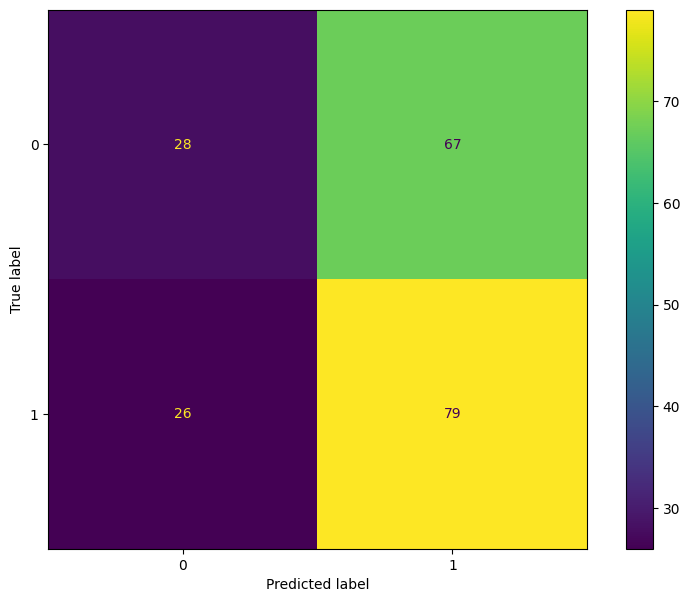

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
y_pred = log_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=log_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=log_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, log_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.518519,0.541096,0.535,0.529807,0.530372
recall,0.294737,0.752381,0.535,0.523559,0.535000
f1-score,0.375839,0.629482,0.535,0.502660,0.509002
support,95.000000,105.000000,0.535,200.000000,200.000000


**Random Forest**

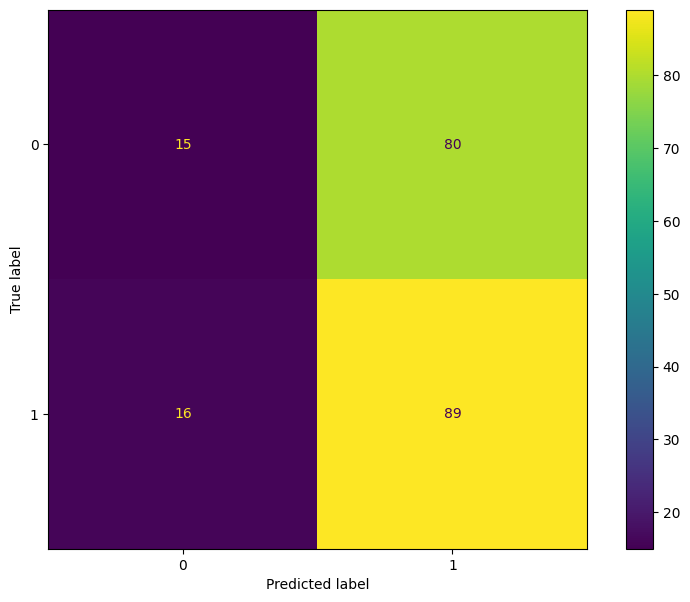

In [ ]:
#Confusion matrix


fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()


In [ ]:
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.483871,0.526627,0.52,0.505249,0.506318
recall,0.157895,0.847619,0.52,0.502757,0.520000
f1-score,0.238095,0.649635,0.52,0.443865,0.454154
support,95.000000,105.000000,0.52,200.000000,200.000000


**XGBoost**

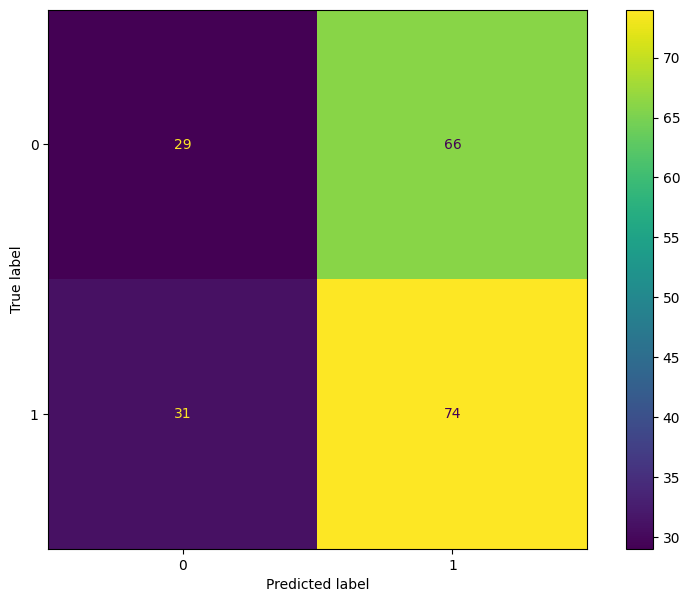

In [ ]:
# confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
y_pred = xgb_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=xgb_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb_gridcv.best_estimator_.classes_)
  # Plot confusion matrix
disp.plot(ax=ax)
plt.show()




In [ ]:
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.483333,0.528571,0.515,0.505952,0.507083
recall,0.305263,0.704762,0.515,0.505013,0.515000
f1-score,0.374194,0.604082,0.515,0.489138,0.494885
support,95.000000,105.000000,0.515,200.000000,200.000000


## Feature importance

In [ ]:
## initiate explainer for Logistic regression
churn_Log_exp = dx.Explainer(log_gridcv, X_train, y_train, label = "Log-Reg Interpretation")
## initiate explainer for Random Forest model
churn_rf_exp = dx.Explainer(rf_clf_gridcv, X_train, y_train, label = "RF Interpretation")
## initiate explainer for XGBoost model
churn_xgb_exp = dx.Explainer(xgb_gridcv, X_train, y_train, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 800 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 800 values
  -> model_class       : sklearn.model_selection._search.GridSearchCV (default)
  -> label             : Log-Reg Interpretation
  -> predict function  : <function yhat_proba_default at 0x7c631e93dda0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.419, mean = 0.524, max = 0.702
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.688, mean = 0.00202, max = 0.581
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 800 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to

In [ ]:
# visualizr permutation feature importance for Logistic Regression Model
churn_Log_exp.model_parts().plot()

In [ ]:
# visualizr permutation feature importance for Random Forest Model
churn_rf_exp.model_parts().plot()

In [ ]:
# visualize permutation feature importance for XGBoost model
churn_xgb_exp.model_parts().plot()